In [2]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.0 MB/s eta 0:00:00


In [3]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [4]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


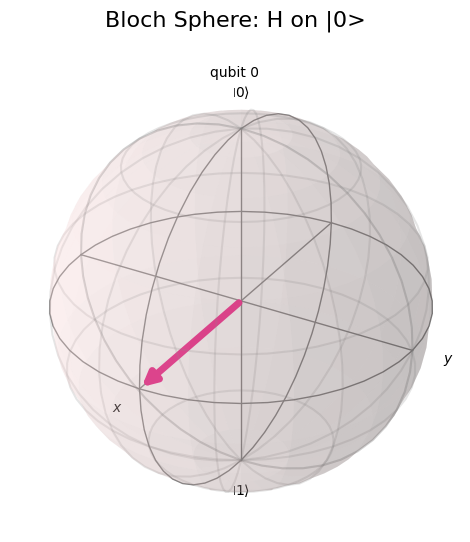

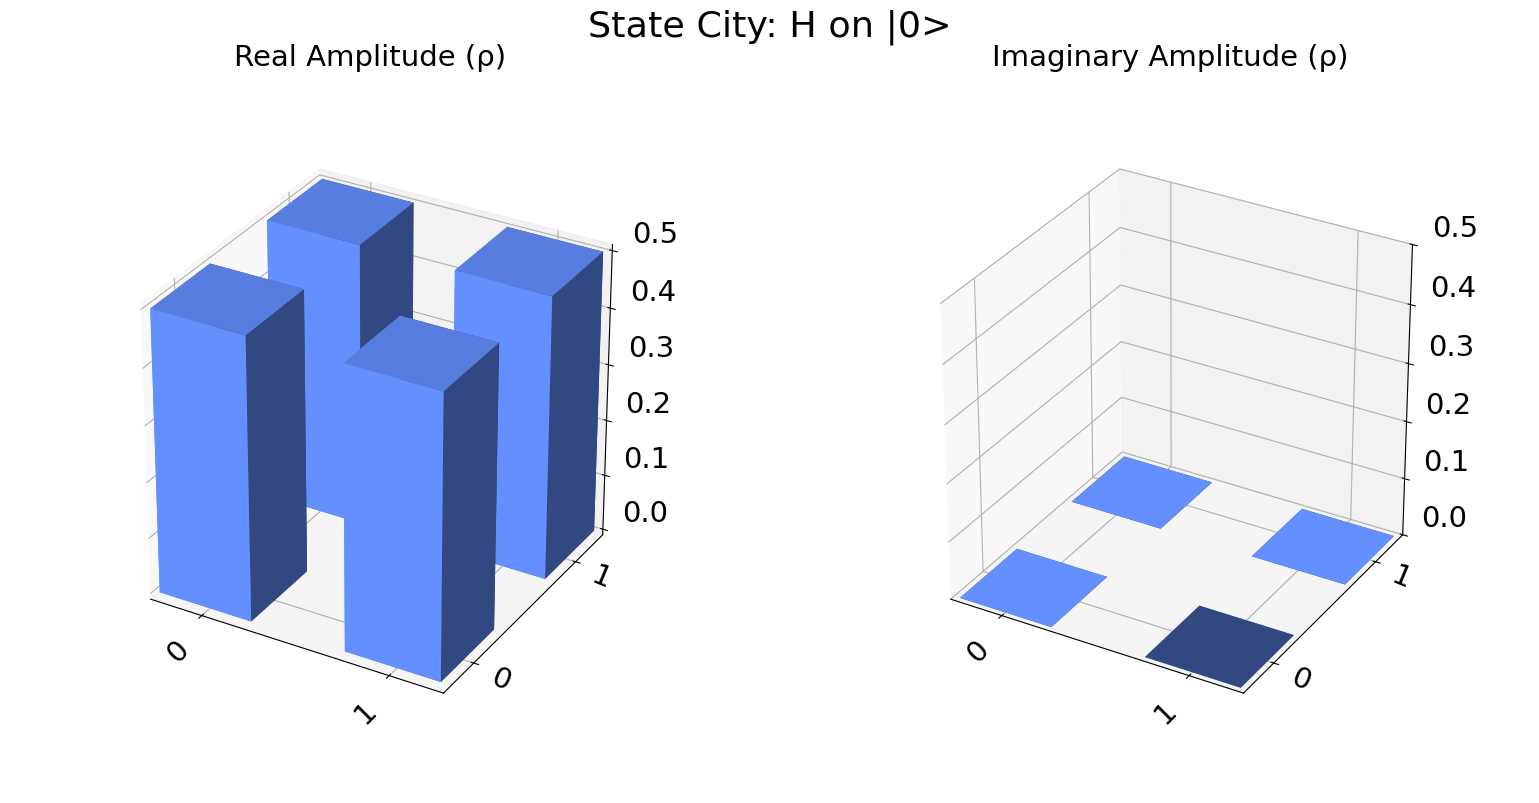

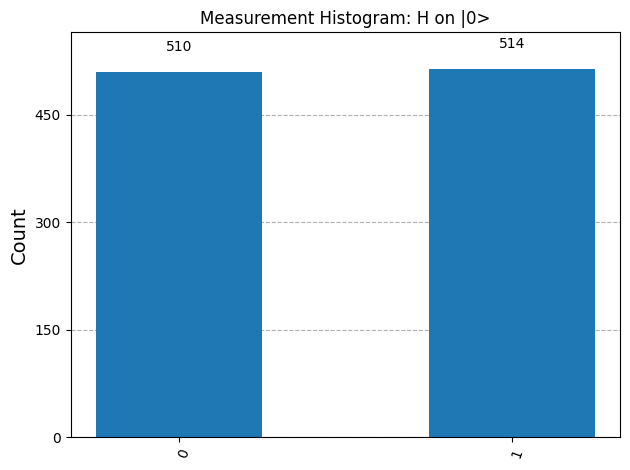



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


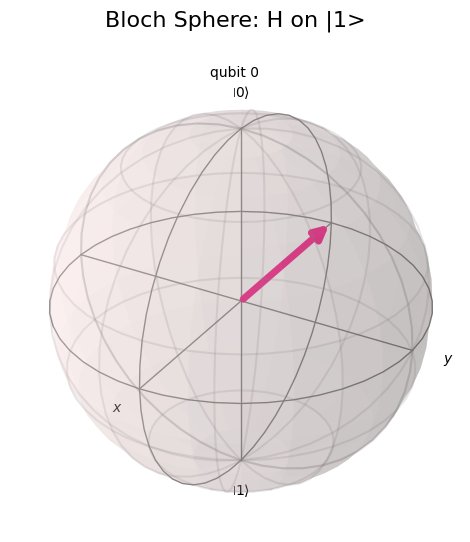

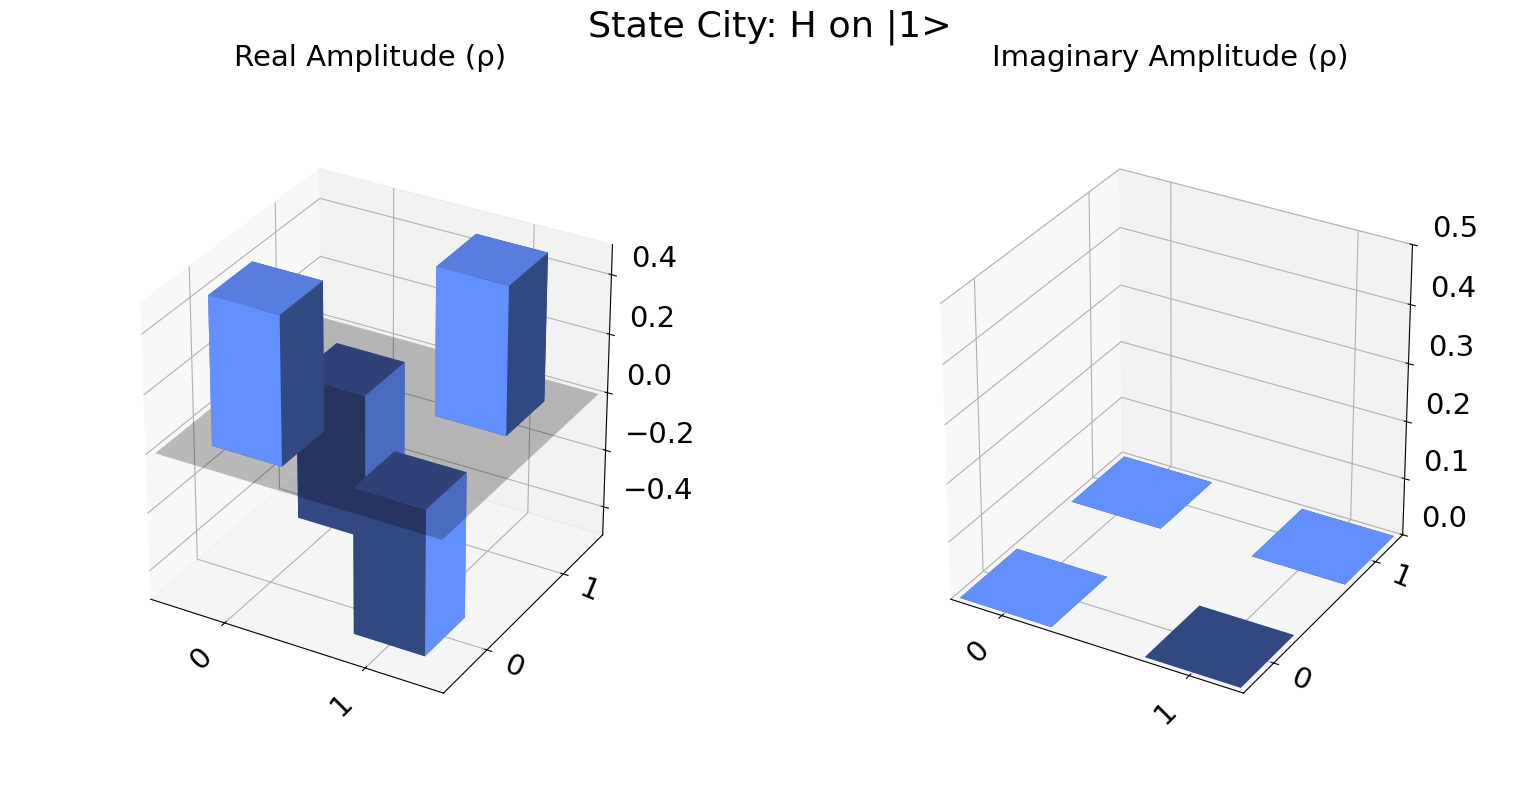

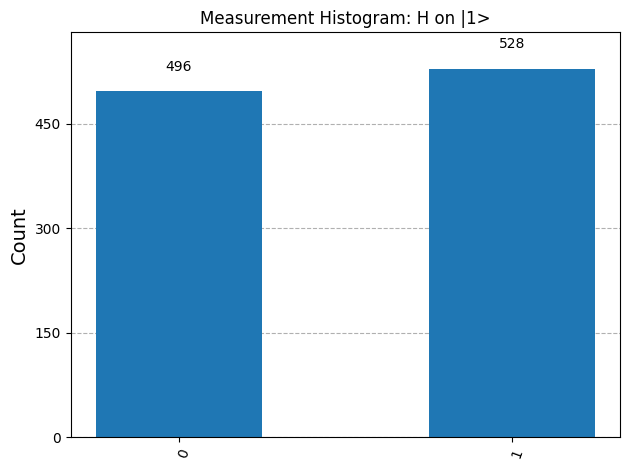



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


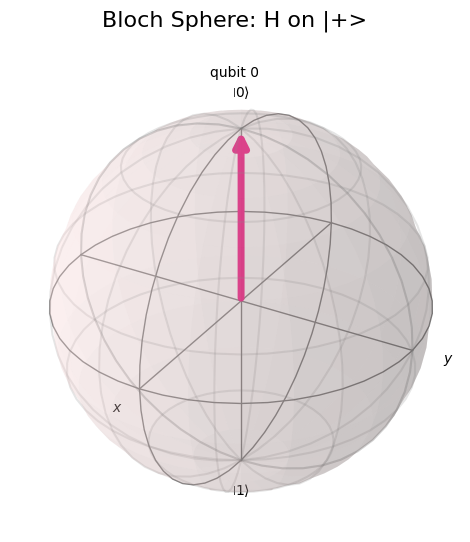

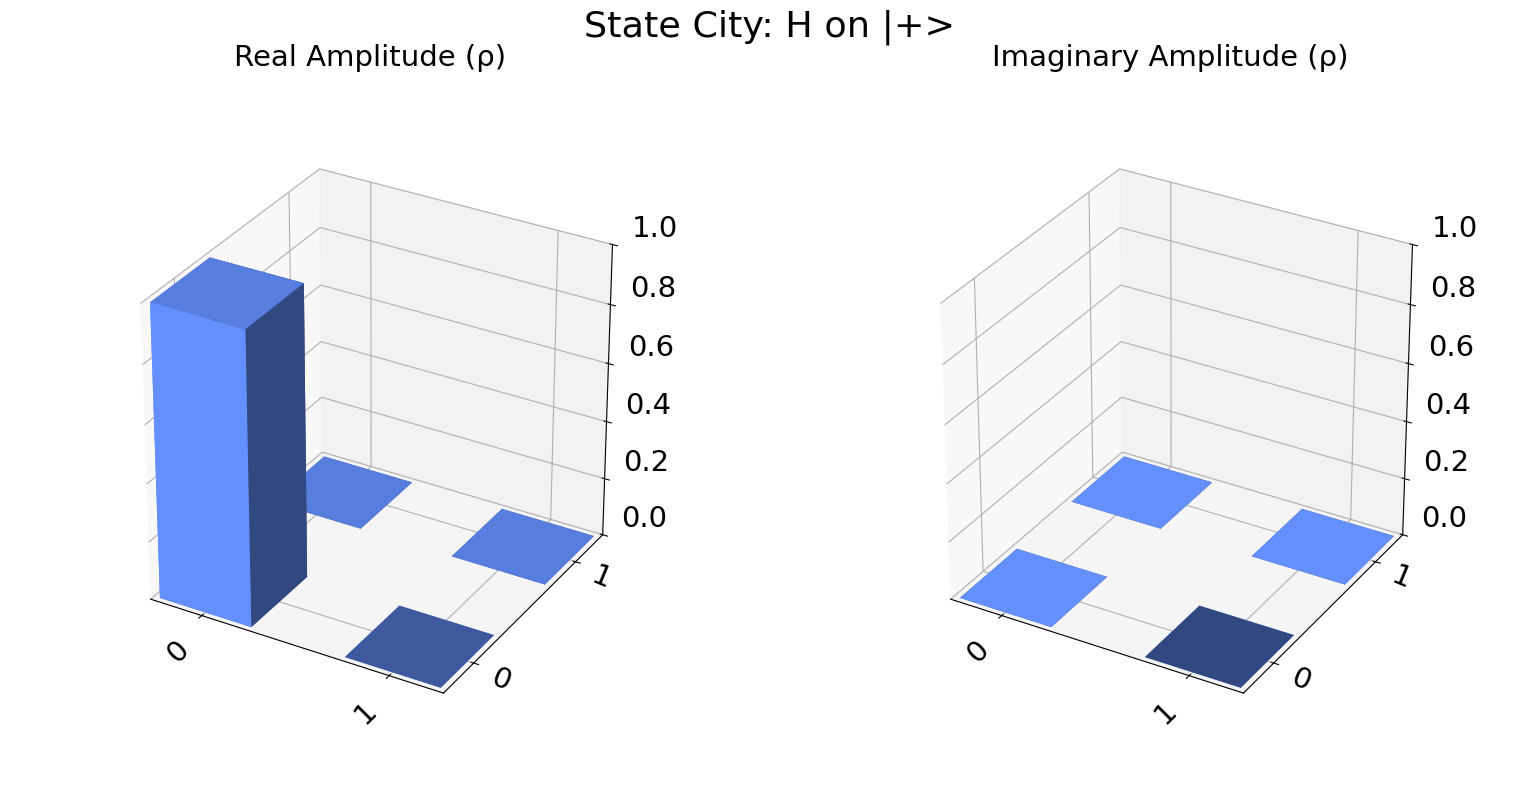

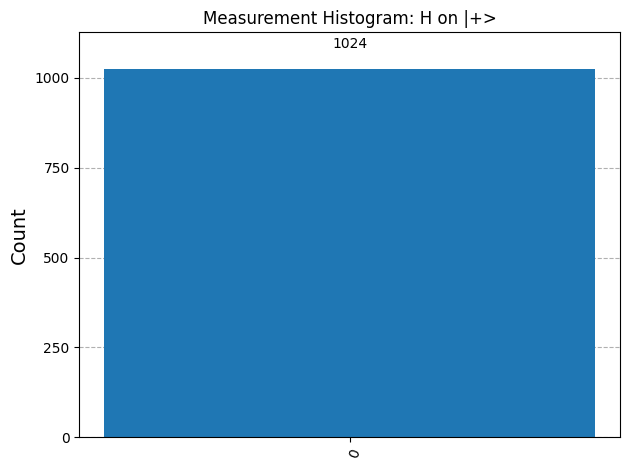



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


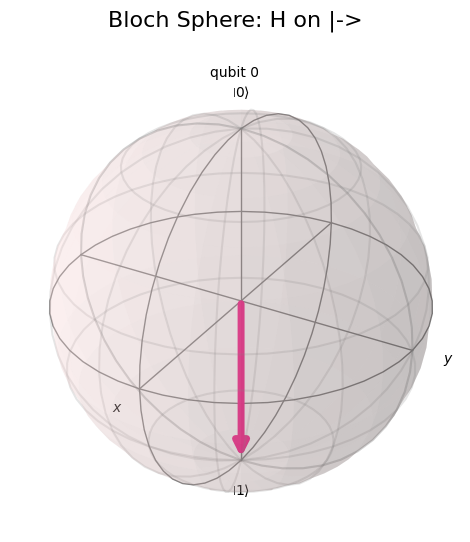

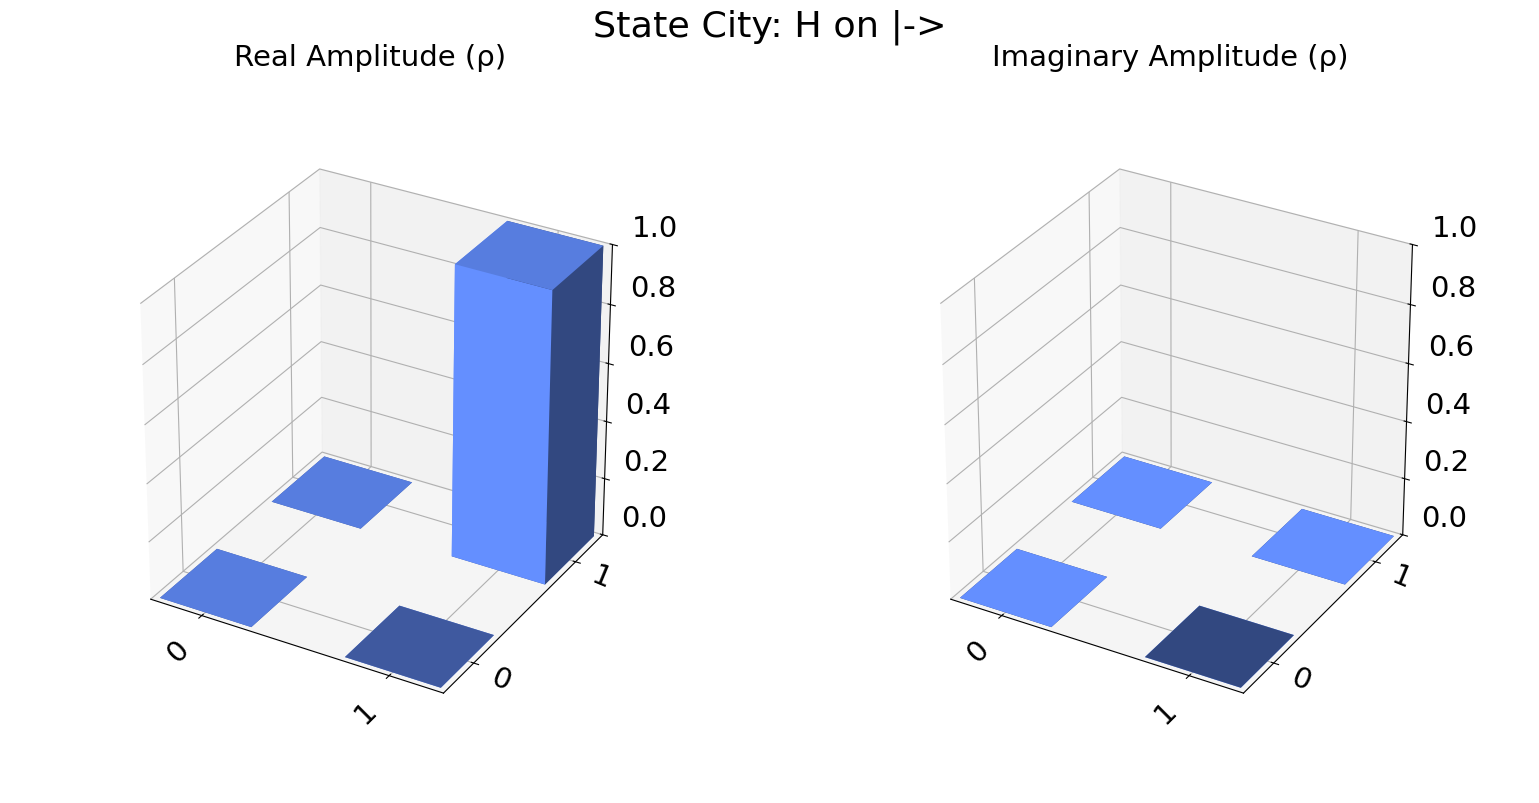

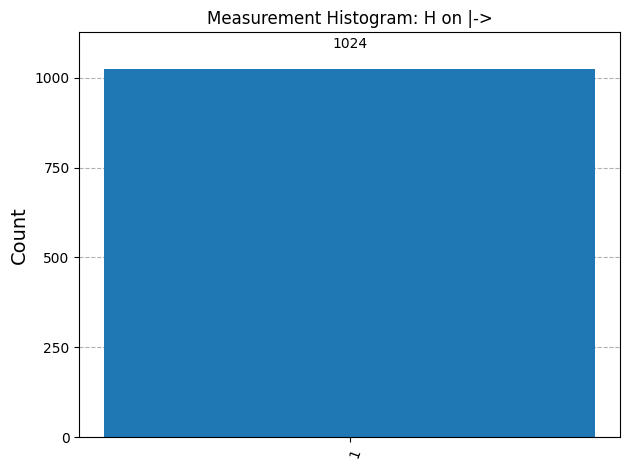

In [5]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------
#TASK-1 Predict the statevector after H on |0>, |1>, |+>, |->
# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


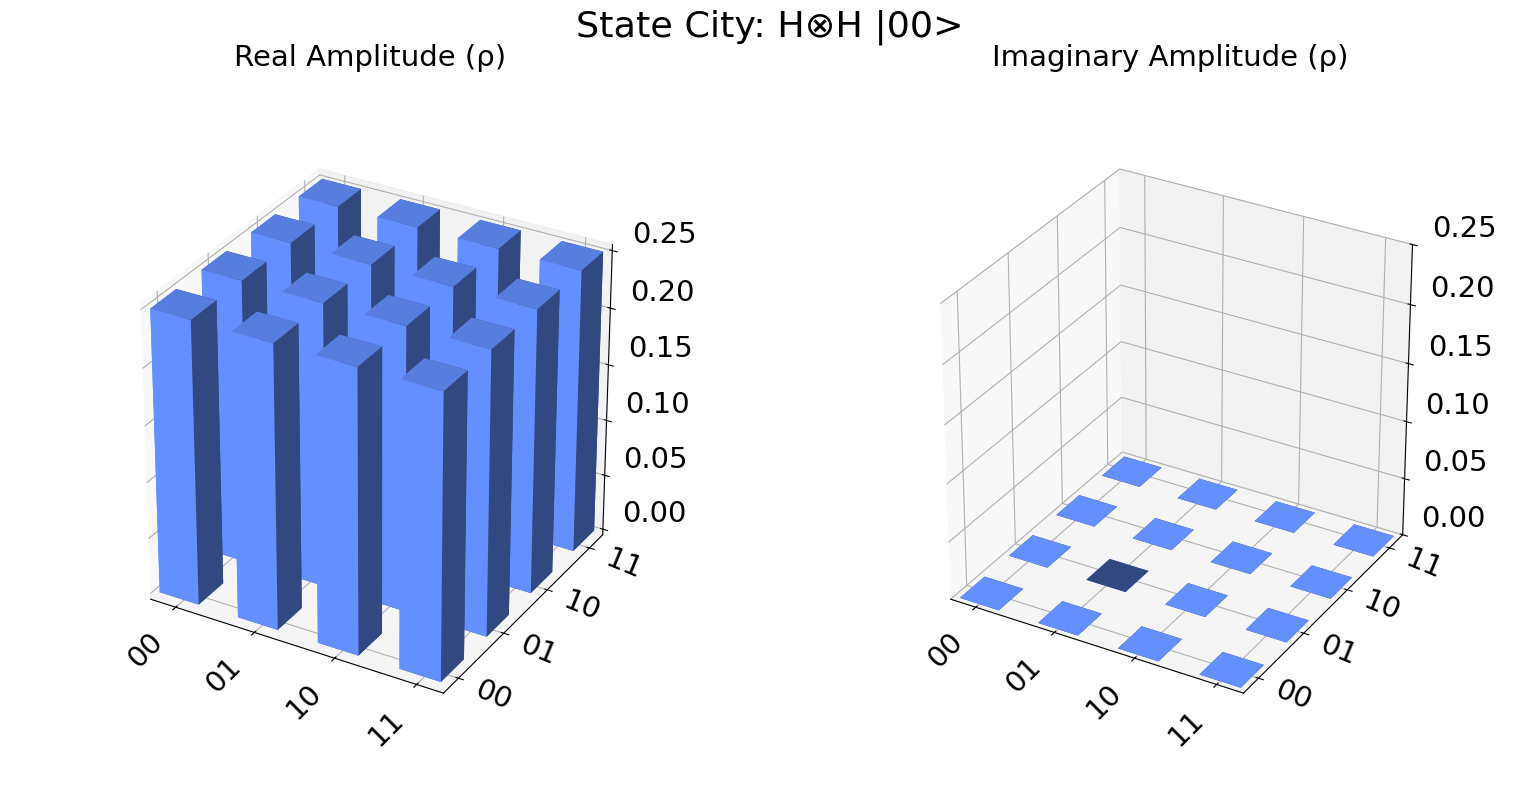

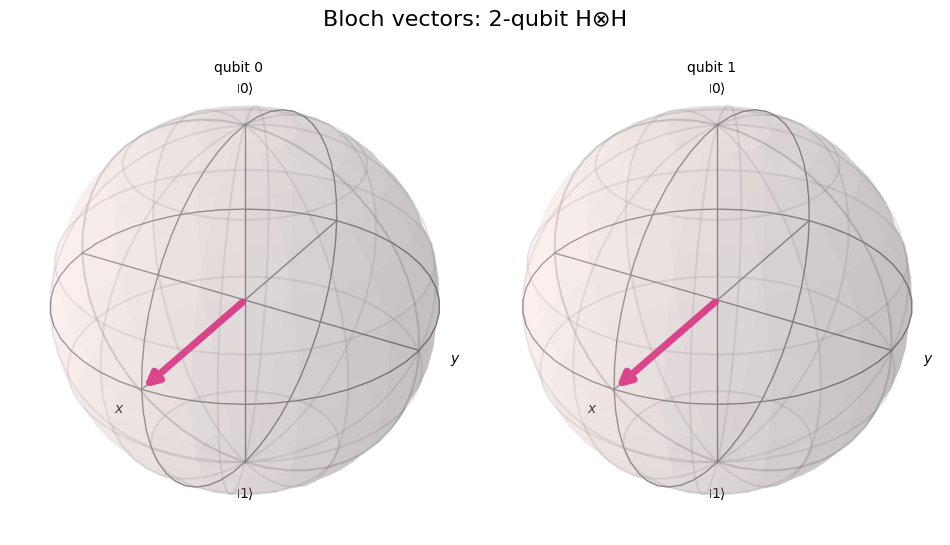

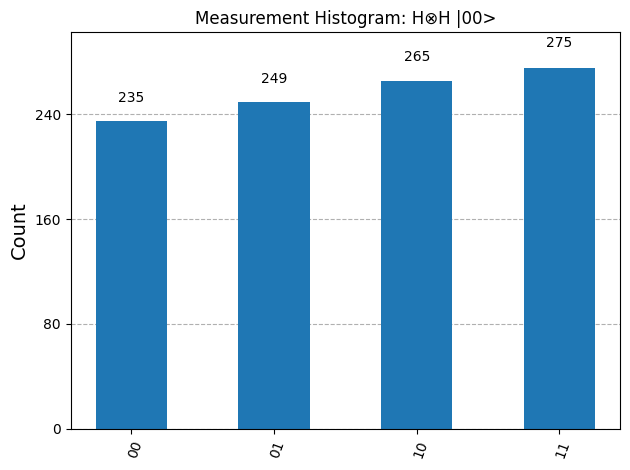


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [6]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Three-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


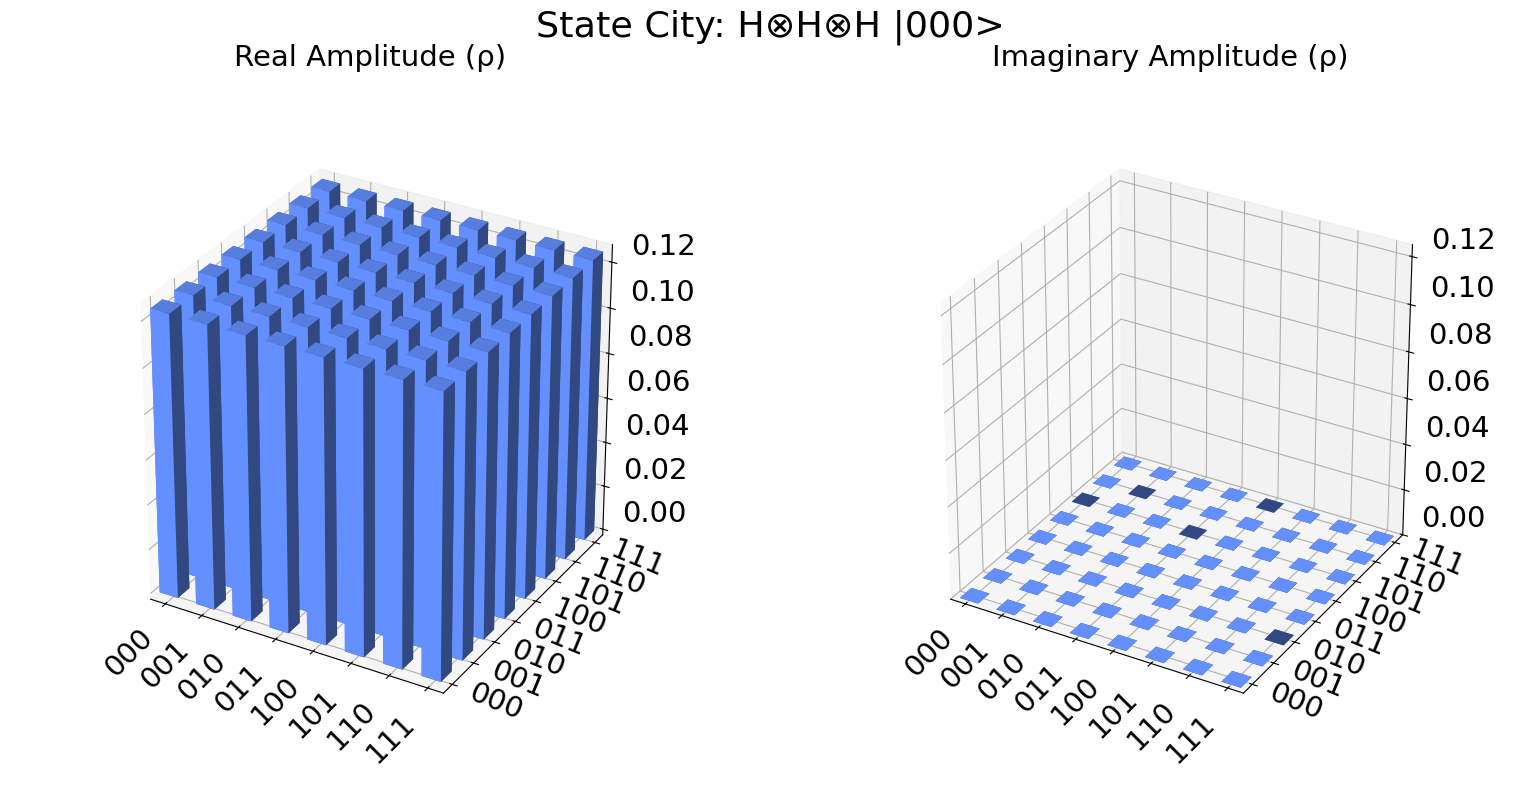

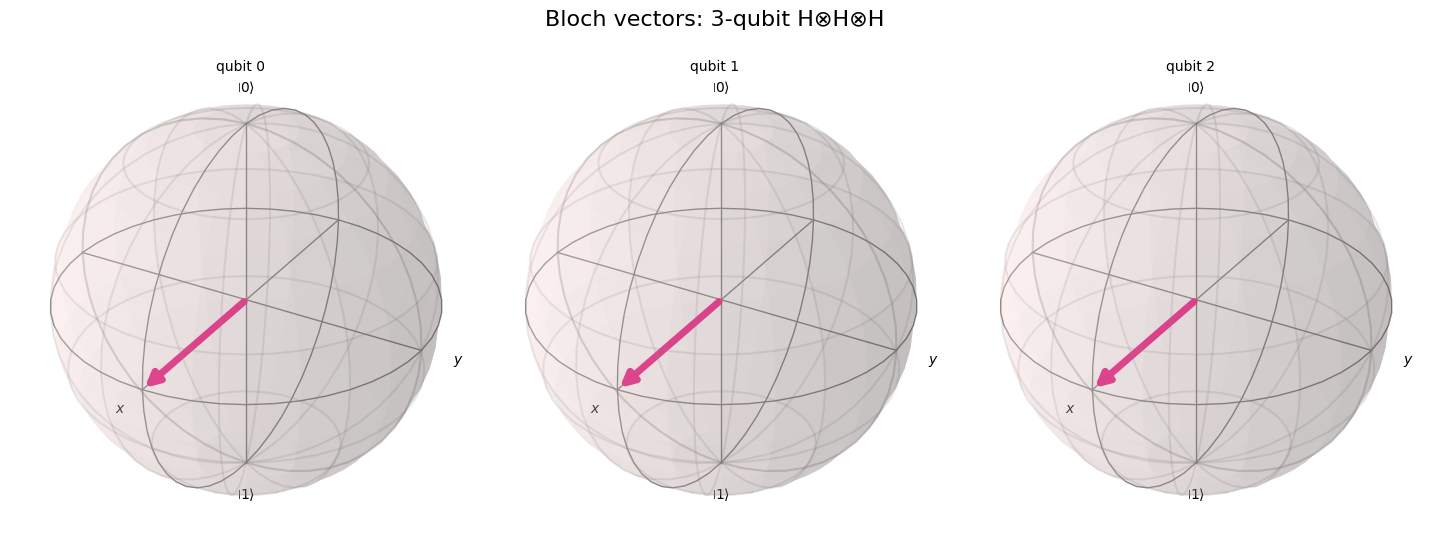

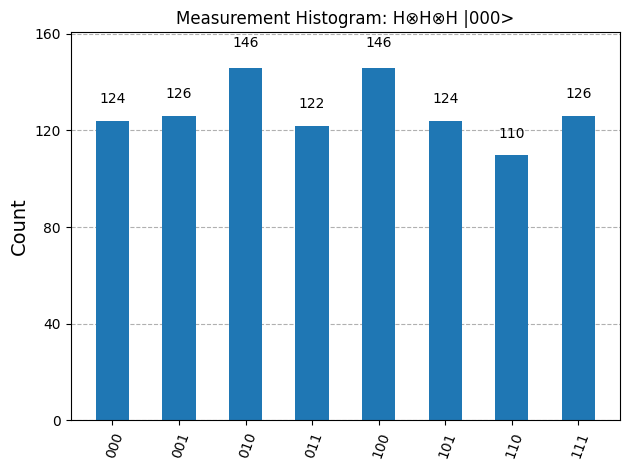


Analytical: equal probability for all 8 outcomes.



In [7]:
#TASK-2 Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities.
# 3-qubit H⊗H⊗H
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Three-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

# Simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("\nAnalytical: equal probability for all 8 outcomes.\n")


--- 3-Qubit H + CX + CX ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


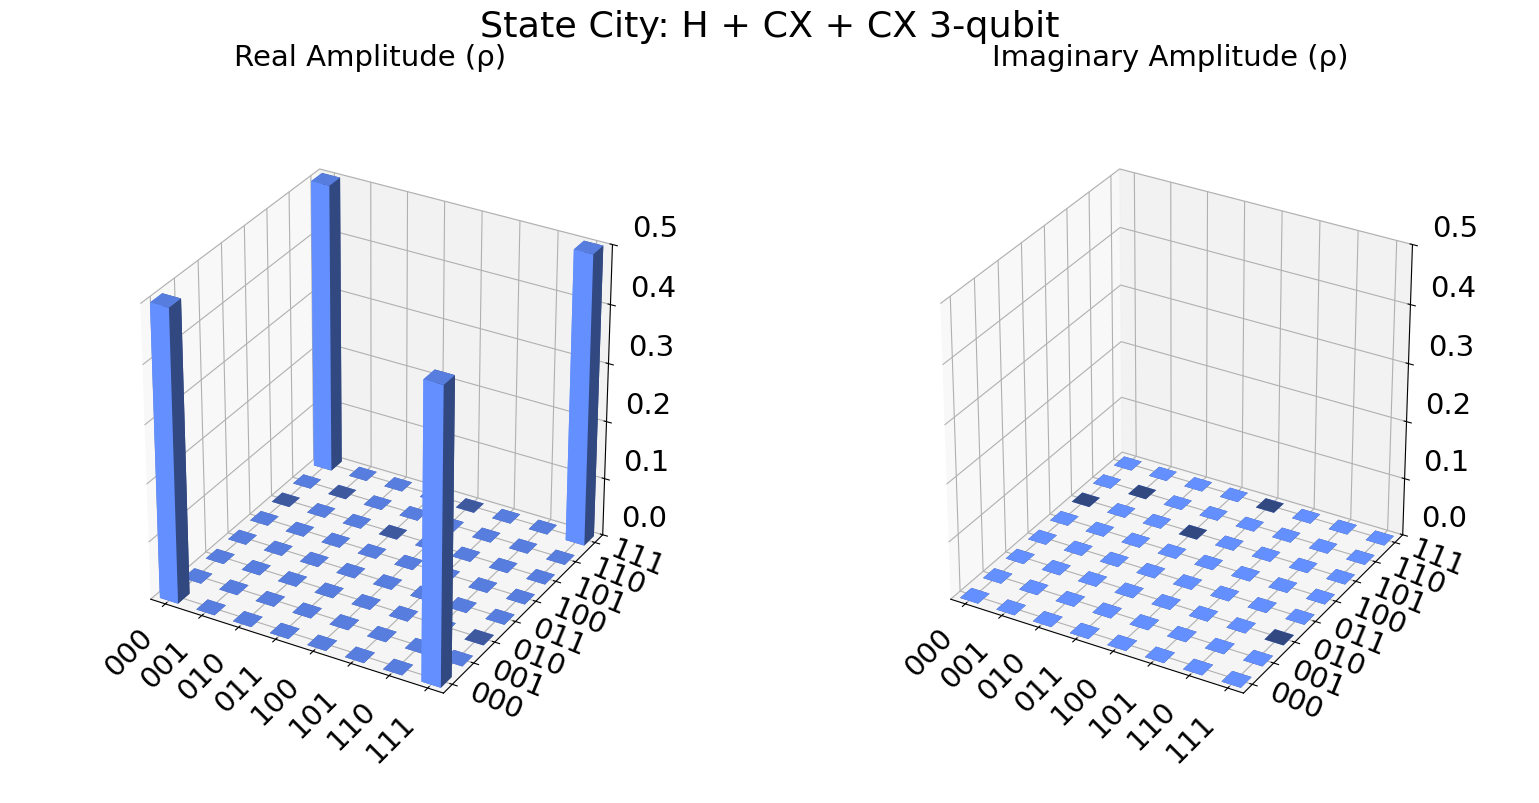

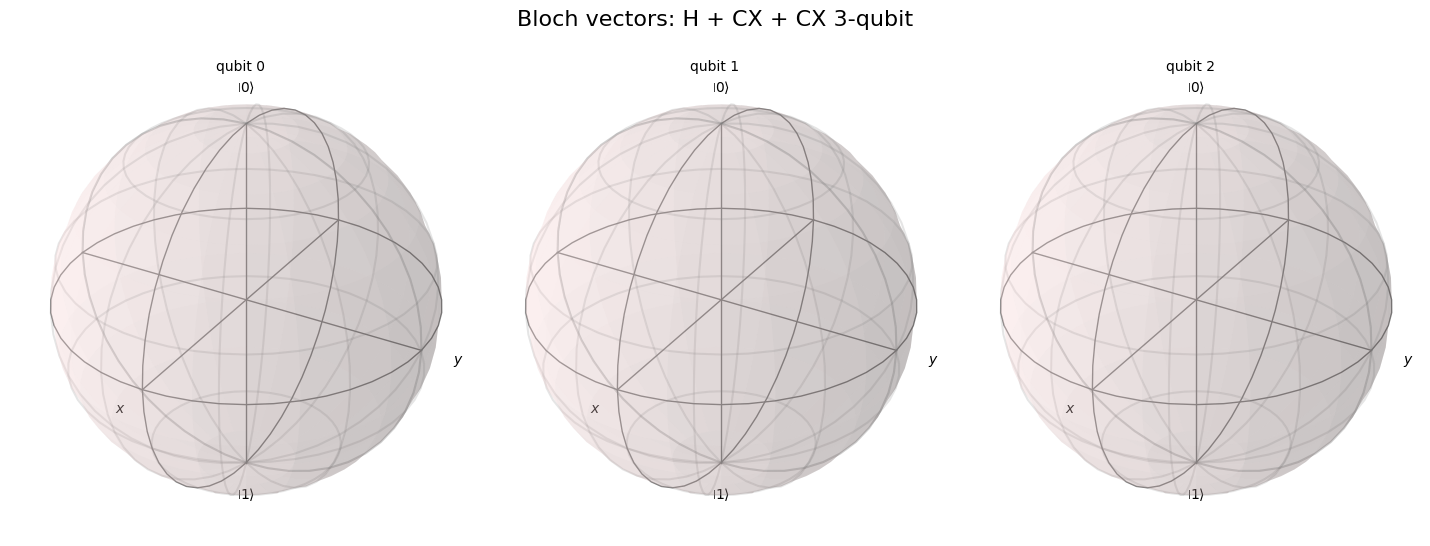

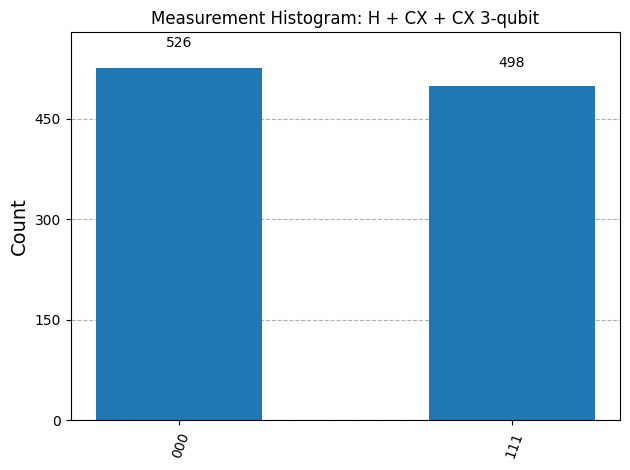


Analytical: correlated outcomes, e.g., |000> and |111>.



In [8]:
#TASK-3 Apply H + CX + CX on 3 qubits and analyze correlations.
# H + CX + CX on 3 qubits
qc3_ent = QuantumCircuit(3, 3)
qc3_ent.h(0)       # Hadamard on first qubit
qc3_ent.cx(0, 1)   # CNOT first->second
qc3_ent.cx(1, 2)   # CNOT second->third
qc3_ent.measure([0,1,2], [0,1,2])

# Statevector
qc3_ent_state = QuantumCircuit(3)
qc3_ent_state.h(0)
qc3_ent_state.cx(0, 1)
qc3_ent_state.cx(1, 2)
state3_ent = Statevector.from_instruction(qc3_ent_state)

print("--- 3-Qubit H + CX + CX ---")
print("Statevector:", state3_ent.data)

display(plot_state_city(state3_ent, title="State City: H + CX + CX 3-qubit"))
display(plot_bloch_multivector(state3_ent, title="Bloch vectors: H + CX + CX 3-qubit"))

# Simulation
qc3_ent_t = transpile(qc3_ent, sim)
result3_ent = sim.run(qc3_ent_t, shots=1024).result()
counts3_ent = result3_ent.get_counts()
display(plot_histogram(counts3_ent, title="Measurement Histogram: H + CX + CX 3-qubit"))
print("\nAnalytical: correlated outcomes, e.g., |000> and |111>.\n")


Statevector after applying H twice on |1>: [0.+0.j 1.+0.j]


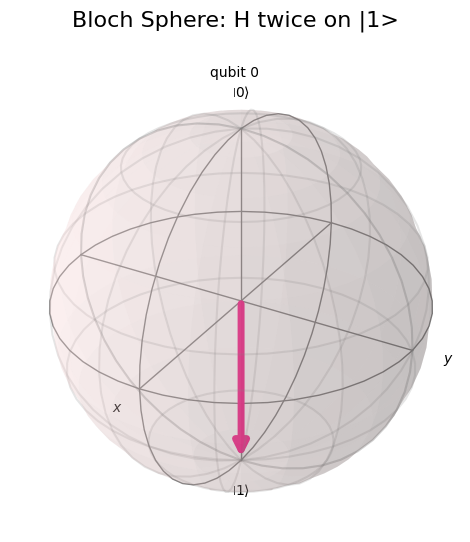

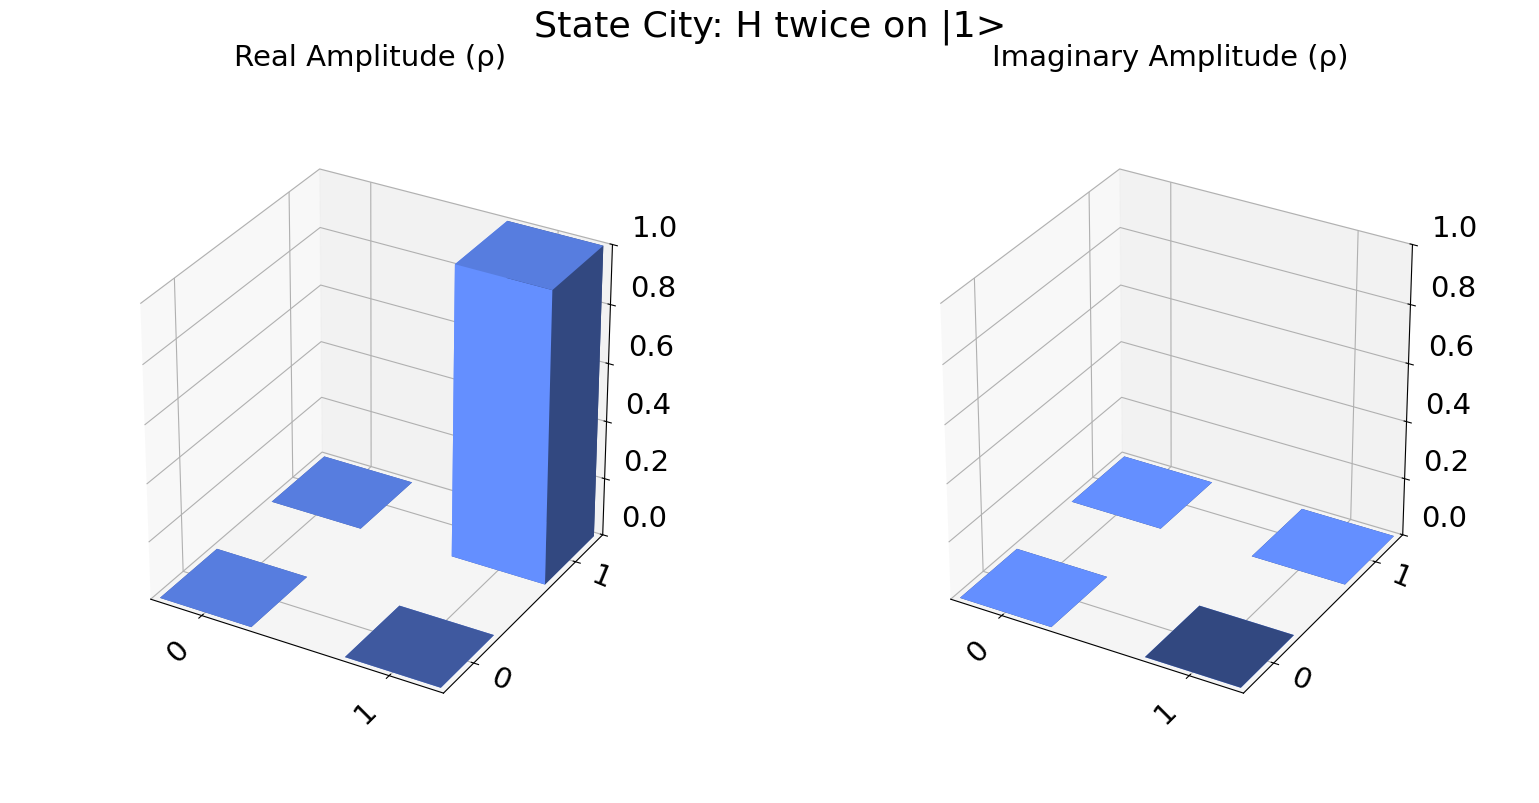

Original |1> statevector: [0 1]


In [9]:
#TASK-4 Apply H twice on |1> and verify the original state.
# Step 1: Initialize |1> state
qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)  # |1> = [0,1]

# Step 2: Apply Hadamard twice
qc.h(0)
qc.h(0)

# Step 3: Get the final statevector
final_state = Statevector.from_instruction(qc)
print("Statevector after applying H twice on |1>:", final_state.data)

# Step 4: Visualize the qubit
display(plot_bloch_multivector(final_state, title="Bloch Sphere: H twice on |1>"))
display(plot_state_city(final_state, title="State City: H twice on |1>"))

# Optional check: Compare with original |1>
original_state = np.array([0, 1])
print("Original |1> statevector:", original_state)

--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


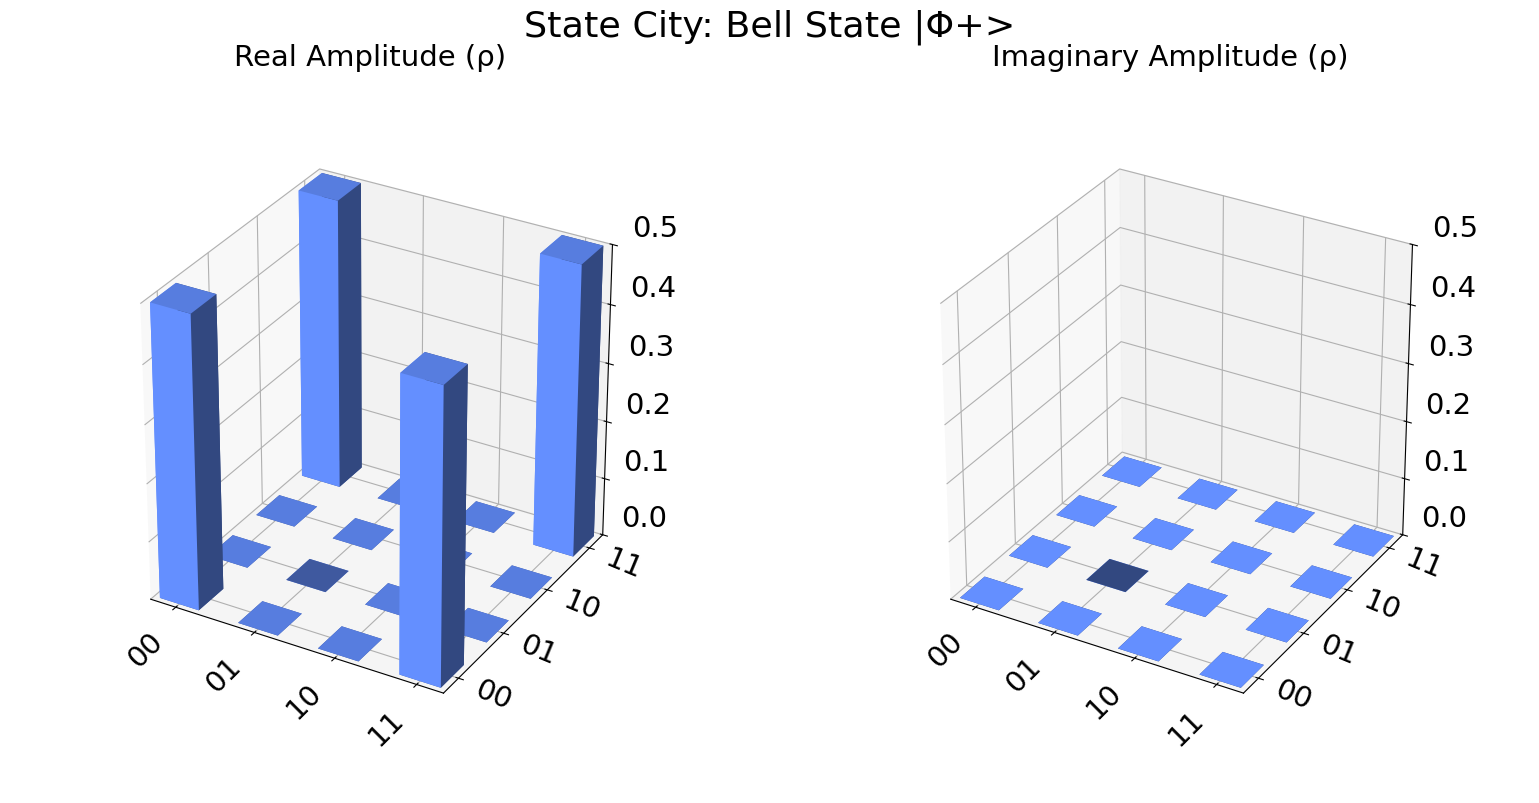

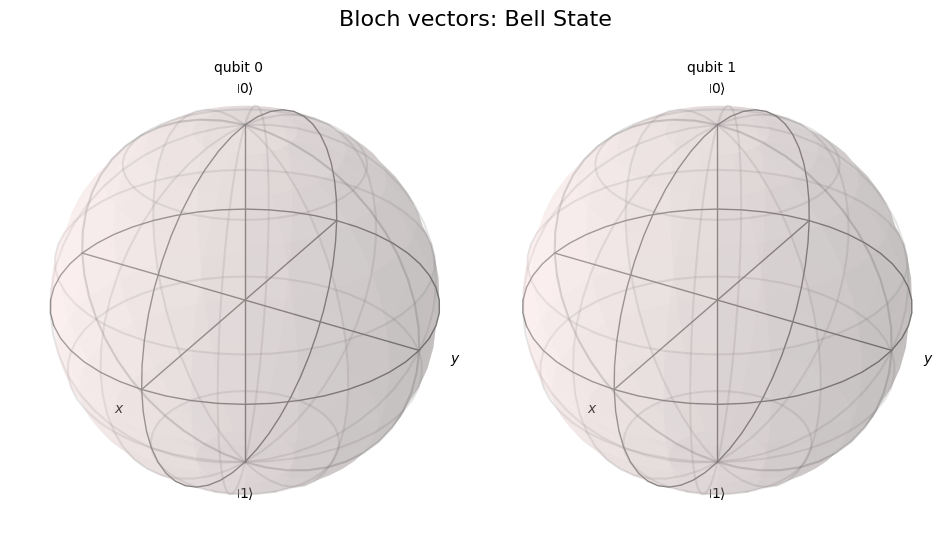

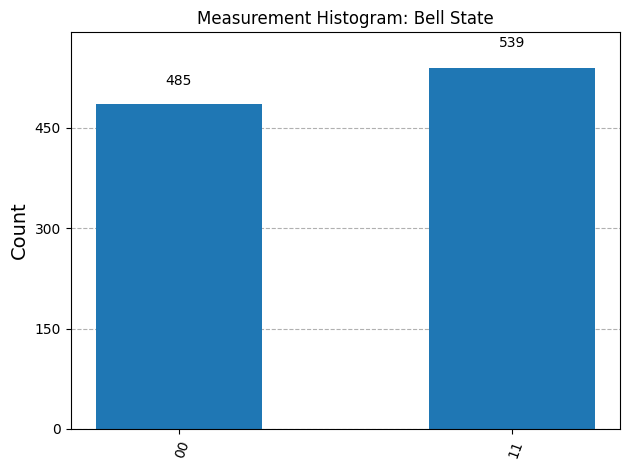


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [10]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


--- Initial State |1> ---
Statevector: [0.+0.j 1.+0.j]


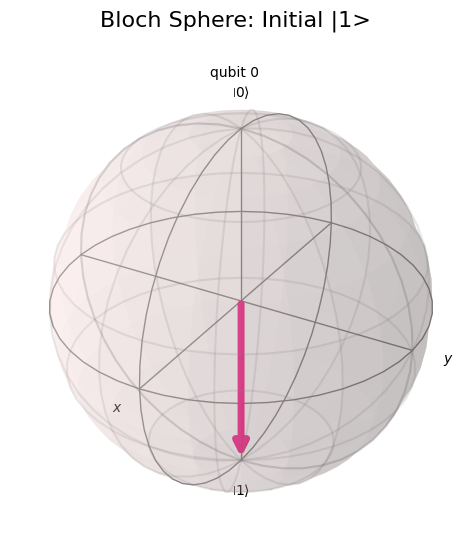

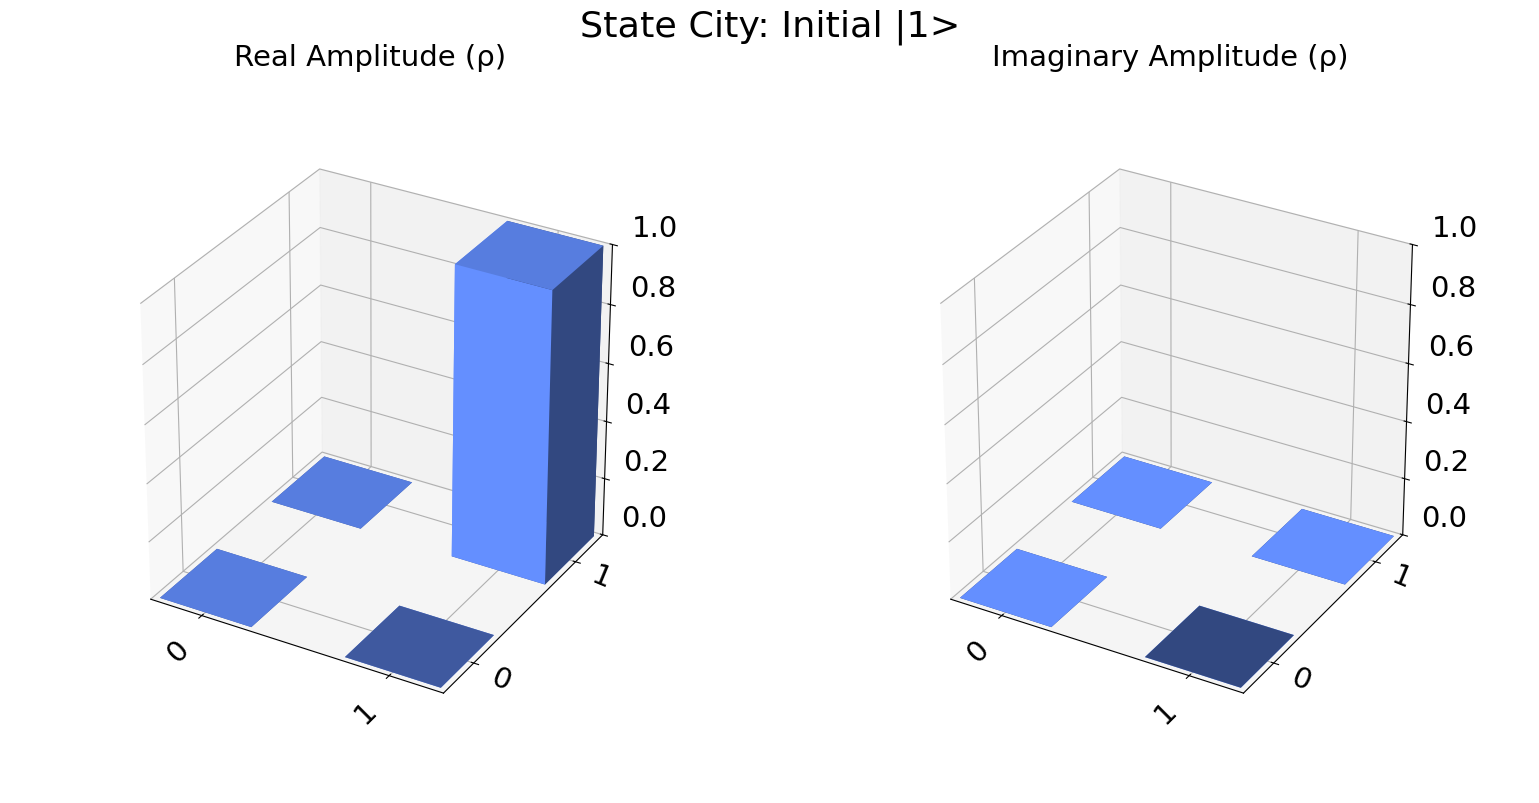


--- After 1st Hadamard ---
Statevector: [ 0.70710678+0.j -0.70710678+0.j]


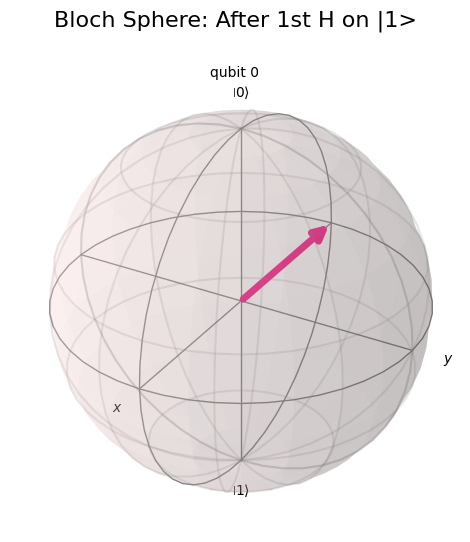

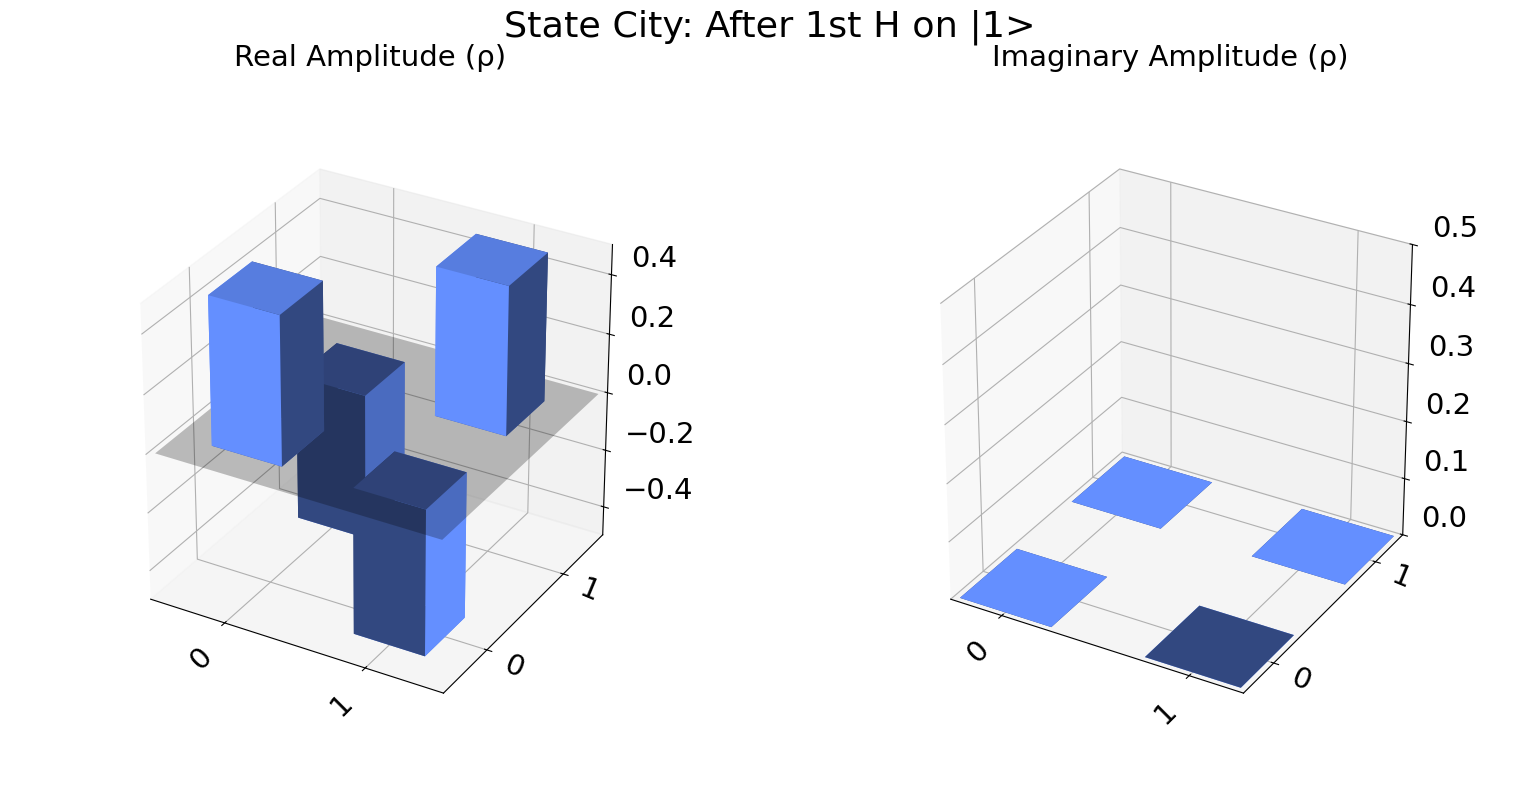


--- After 2nd Hadamard ---
Statevector: [0.+0.j 1.+0.j]


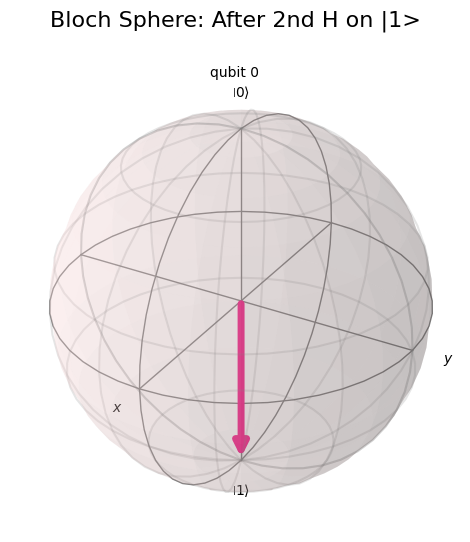

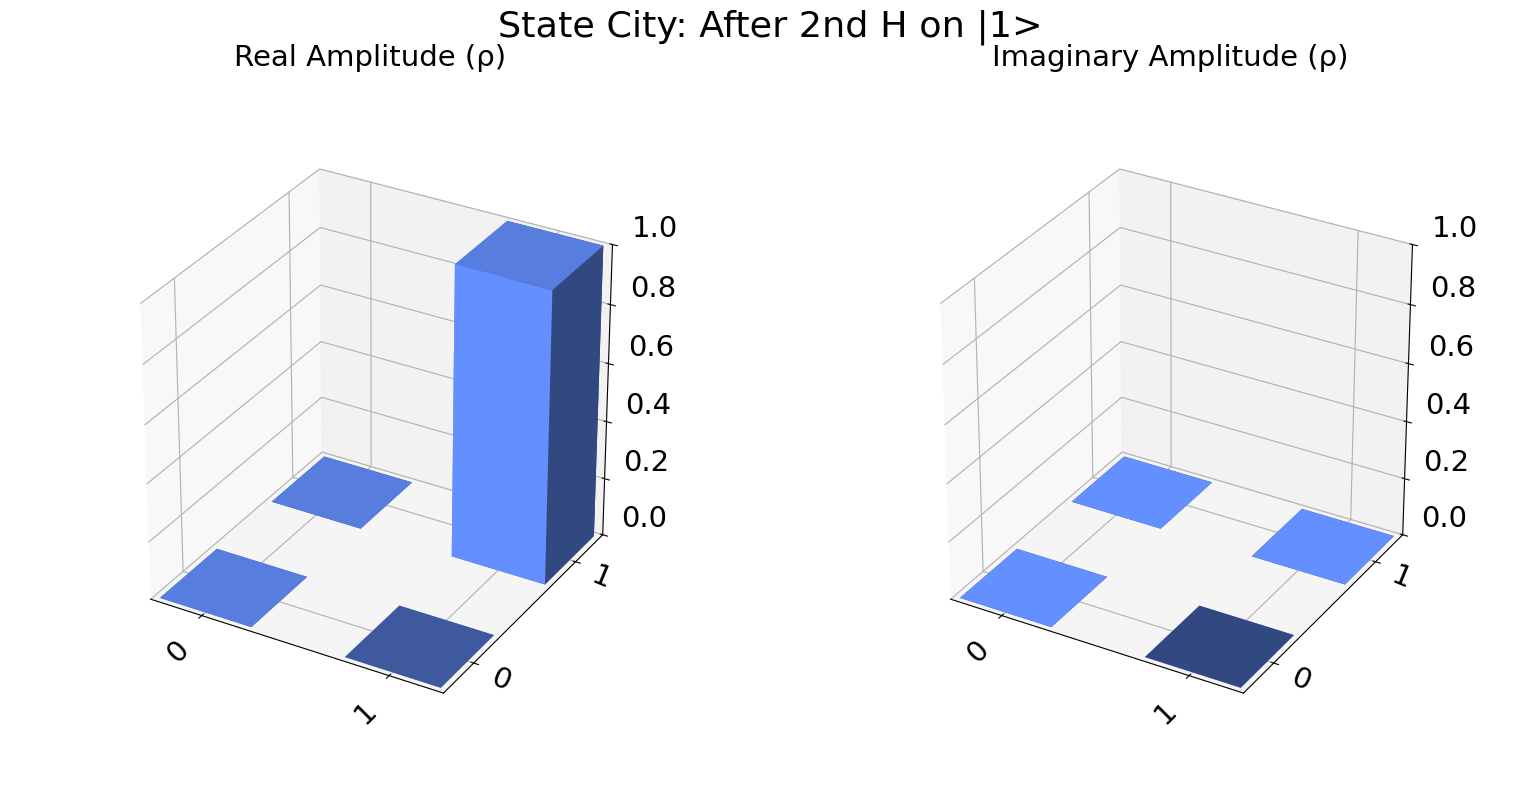

In [11]:
#TASK-5 Use Bloch sphere plots to observe qubit rotations after Hadamard.
# Step 1: Initialize |1> state
qc_initial = QuantumCircuit(1)
qc_initial.initialize([0, 1], 0)  # |1> state
state_initial = Statevector.from_instruction(qc_initial)
print("--- Initial State |1> ---")
print("Statevector:", state_initial.data)
display(plot_bloch_multivector(state_initial, title="Bloch Sphere: Initial |1>"))
display(plot_state_city(state_initial, title="State City: Initial |1>"))

# Step 2: Apply Hadamard once (rotation to superposition |−⟩)
qc_h1 = QuantumCircuit(1)
qc_h1.initialize([0, 1], 0)
qc_h1.h(0)
state_after_h = Statevector.from_instruction(qc_h1)
print("\n--- After 1st Hadamard ---")
print("Statevector:", state_after_h.data)
display(plot_bloch_multivector(state_after_h, title="Bloch Sphere: After 1st H on |1>"))
display(plot_state_city(state_after_h, title="State City: After 1st H on |1>"))

# Step 3: Apply Hadamard again (back to |1>)
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)
qc_h2.h(0)
qc_h2.h(0)
state_after_h2 = Statevector.from_instruction(qc_h2)
print("\n--- After 2nd Hadamard ---")
print("Statevector:", state_after_h2.data)
display(plot_bloch_multivector(state_after_h2, title="Bloch Sphere: After 2nd H on |1>"))
display(plot_state_city(state_after_h2, title="State City: After 2nd H on |1>"))
